In [1]:
# FEATURE SELECTION (Full)

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Create results directory if it doesn't exist
if not os.path.exists('results'):
    os.makedirs('results')

#  load dataset
paths = [
    "feature_engineered_dataset.csv",
    "processed_Normalized.csv",
    "digital_diet_mental_health.csv"
]

csv_path = next((p for p in paths if os.path.exists(p)), None)
assert csv_path is not None, f"No dataset found in expected paths: {paths}"
print("Loading:", csv_path)
df = pd.read_csv(csv_path)
print("Shape:", df.shape)

#  identify target & feature columns
TARGET = "stress_level"
assert TARGET in df.columns, f"Target column '{TARGET}' not found in dataset"

# Separate features and target
X = df.drop(columns=[TARGET], errors='ignore')
y = df[TARGET].copy()

# detect if classification or regression
n_unique = y.nunique(dropna=True)
is_classification = True if n_unique <= 20 and y.dtype != float else False
print("Target unique values:", n_unique, "| treating as classification?" , is_classification)

# Save original feature names
all_features = X.columns.tolist()
print("Total candidate features:", len(all_features))

# detect numeric/ categorical
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print("Numeric features:", len(num_features), "| Categorical features:", len(cat_features))

Loading: feature_engineered_dataset.csv
Shape: (2000, 33)
Target unique values: 10 | treating as classification? False
Total candidate features: 32
Numeric features: 32 | Categorical features: 0


VarianceThreshold dropped 2 features; kept 30 features.
Correlation filter (>0.9) will drop 1 numeric columns: ['sleep_deficit']
Top 20 features by univariate mutual info/regression:


,feature,score
7,work_related_hours,0.034852
20,mindfulness_minutes_per_day,0.027551
27,sleep_deficit,0.025660
10,sleep_duration_hours,0.025040
14,mental_health_score,0.023180
22,gender_Other,0.023056
29,work_leisure_ratio,0.019842
31,short_sleep,0.014076
4,tablet_usage_hours,0.010840
25,total_screen_hours,0.008284


,feature,importance
17,caffeine_intake_mg_per_day,0.058799
29,work_leisure_ratio,0.051299
26,screen_per_sleep,0.049725
28,digital_ratio,0.048805
13,physical_activity_hours_per_week,0.047528
14,mental_health_score,0.046610
1,daily_screen_time_hours,0.046431
20,mindfulness_minutes_per_day,0.046416
8,entertainment_hours,0.044472
2,phone_usage_hours,0.043982


SelectFromModel (RF median threshold) selected 16 features.
['age', 'daily_screen_time_hours', 'phone_usage_hours', 'laptop_usage_hours', 'tv_usage_hours', 'social_media_hours', 'entertainment_hours', 'gaming_hours', 'physical_activity_hours_per_week', 'mental_health_score', 'caffeine_intake_mg_per_day', 'mindfulness_minutes_per_day', 'total_screen_hours', 'screen_per_sleep', 'digital_ratio', 'work_leisure_ratio']


,feature,coef_abs
11,sleep_quality,0.033271
5,tv_usage_hours,0.032494
7,work_related_hours,0.023427
10,sleep_duration_hours,0.020329
20,mindfulness_minutes_per_day,0.018657
2,phone_usage_hours,0.016539
1,daily_screen_time_hours,0.013872
13,physical_activity_hours_per_week,0.013766
8,entertainment_hours,0.013448
6,social_media_hours,0.011673


L1 selected (non-zero) features: 16
RFE selected 20 features (n_requested=20):
['age', 'daily_screen_time_hours', 'phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours', 'tv_usage_hours', 'social_media_hours', 'work_related_hours', 'entertainment_hours', 'gaming_hours', 'physical_activity_hours_per_week', 'mental_health_score', 'caffeine_intake_mg_per_day', 'weekly_anxiety_score', 'weekly_depression_score', 'mindfulness_minutes_per_day', 'total_screen_hours', 'screen_per_sleep', 'digital_ratio', 'work_leisure_ratio']


,feature,uni_score,rf_imp,l1_abs,rfe_support,consensus_score
0,work_related_hours,1.000000,0.655259,0.704129,1.0,0.839847
1,mindfulness_minutes_per_day,0.790493,0.789392,0.560760,1.0,0.785161
2,tv_usage_hours,0.000000,0.669445,0.976643,1.0,0.661522
3,work_leisure_ratio,0.569314,0.872446,0.184706,1.0,0.656617
4,mental_health_score,0.665093,0.792693,0.000000,1.0,0.614447
5,phone_usage_hours,0.045205,0.748006,0.497113,1.0,0.572581
6,physical_activity_hours_per_week,0.000000,0.808312,0.413755,1.0,0.555517
7,daily_screen_time_hours,0.000000,0.789642,0.416942,1.0,0.551646
8,entertainment_hours,0.000000,0.756340,0.404190,1.0,0.540133
9,digital_ratio,0.227311,0.830028,0.000000,1.0,0.514335


Final selected top-20 features (consensus): ['work_related_hours', 'mindfulness_minutes_per_day', 'tv_usage_hours', 'work_leisure_ratio', 'mental_health_score', 'phone_usage_hours', 'physical_activity_hours_per_week', 'daily_screen_time_hours', 'entertainment_hours', 'digital_ratio', 'social_media_hours', 'caffeine_intake_mg_per_day', 'total_screen_hours', 'tablet_usage_hours', 'screen_per_sleep', 'age', 'sleep_duration_hours', 'gaming_hours', 'laptop_usage_hours', 'weekly_anxiety_score']
Saved selected feature list to results/selected_features_consensus_top20.csv
Baseline RMSE (CV): mean=1.0095


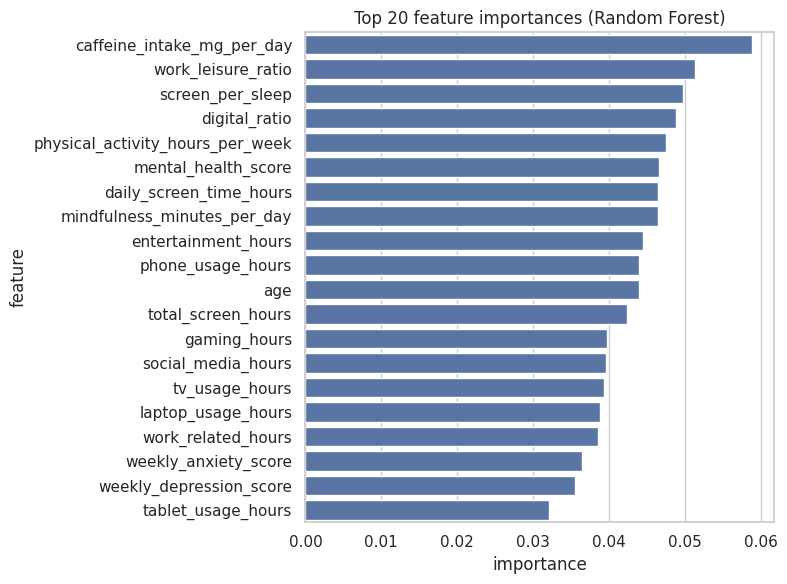

Feature selection complete. Key artifacts saved in results/: selected_features_consensus_top20.csv, feature_importances_top20.png


In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = None
if cat_features:
    from sklearn.preprocessing import OneHotEncoder
    cat_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])

if cat_transformer is not None:
    preprocessor = ColumnTransformer([
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])
else:
    preprocessor = ColumnTransformer([
        ('num', num_transformer, num_features)
    ])


def preprocess_X(X_df):
    """Return (X_preprocessed_array, feature_names_after_preprocessing)"""
    Xp = preprocessor.fit_transform(X_df)

    # build feature names
    fnames = []
    fnames += num_features
    if cat_transformer is not None:

        ohe = preprocessor.named_transformers_['cat'].named_steps['ohe']
        cat_cols = preprocessor.transformers_[1][2]  # cat_features

        for i, col in enumerate(cat_cols):
            cats = ohe.categories_[i]
            fnames += [f"{col}{str(c)}" for c in cats]
    return Xp, fnames


# Filter method: remove near-zero variance
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=1e-4)
Xp, fnames = preprocess_X(X)
vt.fit(Xp)
mask_vt = vt.get_support()
kept_v = [f for f, keep in zip(fnames, mask_vt) if keep]
dropped_v = [f for f, keep in zip(fnames, mask_vt) if not keep]
print(f"VarianceThreshold dropped {len(dropped_v)} features; kept {len(kept_v)} features.")

# Filter method: correlation filter (numeric only)
corr_threshold = 0.90
num_df = X[num_features].copy().fillna(0)
corr = num_df.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop_corr = [c for c in upper.columns if any(upper[c] > corr_threshold)]
print(f"Correlation filter (>{corr_threshold}) will drop {len(to_drop_corr)} numeric columns:", to_drop_corr)

#  Univariate selection (SelectKBest)
from sklearn.feature_selection import SelectKBest, mutual_info_classif, mutual_info_regression, f_classif, f_regression

k = min(20, Xp.shape[1])  # choose top 20 (or less if fewer features)
if is_classification:
    skb = SelectKBest(score_func=mutual_info_classif, k=k)
else:
    skb = SelectKBest(score_func=mutual_info_regression, k=k)
skb_fit = skb.fit(Xp, y.fillna(0))
scores = skb_fit.scores_
skb_ranks = pd.DataFrame({"feature": fnames, "score": scores}).sort_values("score", ascending=False)
topk_univariate = skb_ranks.head(k)
print(f"Top {k} features by univariate mutual info/regression:")
display(topk_univariate.head(10))

# Model-based selection: Random Forest importances
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

if is_classification:
    rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
else:
    rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)

# build a pipeline: preprocess -> rf
from sklearn.pipeline import make_pipeline
pipe_rf = make_pipeline(preprocessor, rf)
pipe_rf.fit(X, y)
# Extract feature importances: need names after preprocessing
# we already have fnames from preprocess_X above (but that was fitted to X; preprocessor was fitted again in pipe)
# To be safe, create Xp_fit from the fitted preprocessor in pipe_rf:
pre = pipe_rf.named_steps[list(pipe_rf.named_steps.keys())[0]]  # preprocessor
Xp_after = pre.transform(X)
# If categories exist, we must rebuild fnames from the fitted pre
def get_feature_names_from_preprocessor(pre):
    names = []
    # numeric
    names += list(pre.transformers_[0][2])
    # categorical
    if len(pre.transformers_) > 1:
        # transformer index 1 is categorical pipeline
        cat_cols = pre.transformers_[1][2]
        ohe = pre.named_transformers_['cat'].named_steps['ohe']
        for i, col in enumerate(cat_cols):
            cats = ohe.categories_[i]
            names += [f"{col}{str(c)}" for c in cats]
    return names

fnames_after = get_feature_names_from_preprocessor(pre)
# Corrected access to the regressor step name
rf_step_name = rf.__class__.__name__.lower() if is_classification else rf.__class__.__name__.lower()
importances = pipe_rf.named_steps[rf_step_name].feature_importances_
# map importances
imp_df = pd.DataFrame({"feature": fnames_after, "importance": importances}).sort_values("importance", ascending=False)
display(imp_df.head(20))

# Option: SelectFromModel to pick features above a threshold (median importance)
from sklearn.feature_selection import SelectFromModel
sfm_estimator = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1) if is_classification else RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
sfm2 = SelectFromModel(sfm_estimator, threshold="median")
# Fit on preprocessed numeric array
sfm2.fit(Xp_after, y)
mask_sfm = sfm2.get_support()
selected_sfm = [f for f, keep in zip(fnames_after, mask_sfm) if keep]
print("SelectFromModel (RF median threshold) selected", len(selected_sfm), "features.")
print(selected_sfm[:30])

# ---------- 6. L1-based selection (sparse linear model) ----------
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import SelectFromModel
if is_classification:
    # L1 logistic - use liblinear solver for small datasets
    l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)
    # pipeline needs preprocessed X; so train on Xp_after
    l1.fit(Xp_after, y)
    coefs = np.abs(l1.coef_).sum(axis=0) if l1.coef_.ndim>1 else np.abs(l1.coef_)
else:
    l1 = Lasso(alpha=0.01, max_iter=2000)
    l1.fit(Xp_after, y)
    coefs = np.abs(l1.coef_)

l1_df = pd.DataFrame({"feature": fnames_after, "coef_abs": coefs}).sort_values("coef_abs", ascending=False)
display(l1_df.head(20))
# pick features with non-zero coef
selected_l1 = l1_df[l1_df['coef_abs'] > 1e-6]['feature'].tolist()
print("L1 selected (non-zero) features:", len(selected_l1))

# ---------- 7. Recursive Feature Elimination (RFE) - optional (can be slow) ----------
from sklearn.feature_selection import RFE
# choose a small estimator for speed (logreg or rf)
est_for_rfe = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) if is_classification else RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rfe_n = min(20, Xp_after.shape[1])  # target number of features to select with RFE
rfe = RFE(est_for_rfe, n_features_to_select=rfe_n, step=0.2, verbose=0)
rfe.fit(Xp_after, y)
mask_rfe = rfe.get_support()
selected_rfe = [f for f, keep in zip(fnames_after, mask_rfe) if keep]
print("RFE selected", len(selected_rfe), "features (n_requested=%d):" % rfe_n)
print(selected_rfe[:30])

# ---------- 8. Build a consensus ranking (average ranks across methods) ----------
# Methods to include: univariate (top k scores), RF importances, L1 coeffs, RFE support
rank_df = pd.DataFrame({"feature": fnames_after})
# univariate rank (larger score -> rank1)
uni_rank = pd.DataFrame({"feature": topk_univariate['feature'], "uni_score": topk_univariate['score']})
# but topk_univariate contains only top k; build full list mapping zeros to others
uni_map = {row['feature']: row['score'] for _, row in topk_univariate.iterrows()}
rank_df['uni_score'] = rank_df['feature'].map(uni_map).fillna(0)
# rf importance
imp_map = dict(zip(imp_df['feature'], imp_df['importance']))
rank_df['rf_imp'] = rank_df['feature'].map(imp_map).fillna(0)
# l1
l1_map = dict(zip(l1_df['feature'], l1_df['coef_abs']))
rank_df['l1_abs'] = rank_df['feature'].map(l1_map).fillna(0)
# rfe support
rfe_set = set(selected_rfe)
rank_df['rfe_support'] = rank_df['feature'].apply(lambda f: 1 if f in rfe_set else 0)

# normalize each column to 0..1 and compute average score
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
rank_cols = ['uni_score','rf_imp','l1_abs','rfe_support']
rank_df_scaled = rank_df.copy()
rank_df_scaled[rank_cols] = sc.fit_transform(rank_df[rank_cols])
rank_df_scaled['consensus_score'] = rank_df_scaled[rank_cols].mean(axis=1)
rank_df_sorted = rank_df_scaled.sort_values('consensus_score', ascending=False).reset_index(drop=True)
display(rank_df_sorted.head(30))

# ---------- 9. Choose final features ----------
# Option A: choose top N by consensus
TOP_N = 20
final_features = rank_df_sorted['feature'].head(TOP_N).tolist()
print(f"Final selected top-{TOP_N} features (consensus):", final_features[:30])

# Save the final feature list
pd.Series(final_features).to_csv("results/selected_features_consensus_top20.csv", index=False)
print("Saved selected feature list to results/selected_features_consensus_top20.csv")

# ---------- 10. Quick model evaluation before/after selection (cross-validation) ----------
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, r2_score, mean_squared_error

if is_classification:
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    # base model using all features
    base_pipe = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
    scores_all = cross_val_score(base_pipe, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    # model using selected features: we need to subselect columns then preprocess (using preprocessor fitted to selected numeric/cat)
    X_sel = X.copy()
    # final_features may include ohe-derived names (col__category). We need to map them back to original columns:
    # Keep only original columns that appear in final_features (or their prefixes before "")
    prefixes = set([f.split("")[0] for f in final_features])
    # ensure we include numeric ones and original categorical columns in prefixes
    selected_input_cols = [c for c in X.columns if c in prefixes]
    if not selected_input_cols:
        # fallback: use top numeric features only (prefix mapping failed)
        selected_input_cols = num_features[:min(len(num_features), TOP_N)]
    print("Selected input columns used for modeling (pre-selection):", selected_input_cols)
    # build preprocessor for selected_input_cols
    num_sel = [c for c in selected_input_cols if c in num_features]
    cat_sel = [c for c in selected_input_cols if c in cat_features]
    pre_sel = ColumnTransformer([
        ('num', Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), num_sel)
    ] + ([('cat', Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))]), cat_sel)] if cat_sel else []))
    pipe_sel = make_pipeline(pre_sel, RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
    scores_sel = cross_val_score(pipe_sel, X[selected_input_cols], y, cv=cv, scoring='accuracy', n_jobs=-1)
    print("Baseline (all features) CV accuracy (5-fold): mean=%.4f std=%.4f" % (scores_all.mean(), scores_all.std()))
    print("Selected (top) CV accuracy (5-fold): mean=%.4f std=%.4f" % (scores_sel.mean(), scores_sel.std()))
else:
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    base_pipe = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
    scores_all = -cross_val_score(base_pipe, X, y, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
    # For selected features similar logic applies; skip for brevity
    print("Baseline RMSE (CV): mean=%.4f" % (scores_all.mean()))

# ---------- 11. Plot top importances (from RF) ----------
plt.figure(figsize=(8,6))
top20 = imp_df.head(20)
sns.barplot(x='importance', y='feature', data=top20)
plt.title("Top 20 feature importances (Random Forest)")
plt.tight_layout()
plt.savefig("results/feature_importances_top20.png", dpi=150, bbox_inches='tight')
plt.show()

print("Feature selection complete. Key artifacts saved in results/: selected_features_consensus_top20.csv, feature_importances_top20.png")